## Regresi&oacute;n Lineal - Paris Housing Price Prediction

<p>Click para acceder el conjunto de datos <a href="https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction">Paris Housing Price Prediction</a>.</p>


<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="paris.jpg" alt="Una imagen" class="imagen-ajustada">

Este conjunto de datos nos muestra los precios de las viviendas en un entorno urbano ubicado en París, los cuales son datos imaginarios creados con fines educativos para as&iacute; adquirir los conocimientos necesarios, en este caso la usaremos con el fin de usar regresi&oacute;n lineal. 

Los atributos que vienen en el conjunto de datos son los siguientes:

- squareMeters: Metros cuadrados de la casa que se está vendiendo
- numberOfRooms: Número de habitaciones de la casa que se está vendiendo
- hasYard: La casa tiene patio
- hasPool: La casa tiene piscina
- floors: Número de pisos que tiene la casa
- cityCode: Código postal
- cityPartRange: Cuanto mayor es el rango, más exclusivo es el barrio
- numPrevOwners: Número de propietarios anteriores
- made - Año en que fue construida la casa
- isNewBuilt: La casa fue recientemente construida
- hasStormProtector: La casa cuenta con protector contra tormentas
- basement: Metros cuadrados del sótano de la casa
- attic: Metros cuadrados del ático de la casa
- garage: Metros cuadrados del garage de la casa
- hasStorageRoom: La casa cuenta con cuarto de almacenamiento
- hasGuessRoom: Cantidad de cuartos de invitados que tiene la casa
- price: Precio de la vivienda

El objetivo de este an&aacute;lisis de datos es encontrar si es viable predecir el precio de una casa en base de ciertos valores que se averiguaran a lo largo del an&aacute;lisis exploratorio.

Primero se importan las l&iacute;brerias necesarias para utilizar este conjunto de datos.

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Luego se importa el conjunto de datos en un dataframe para mejor manipulaci&oacute;n de datos.

In [14]:
df = pd.read_csv('ParisHousing.csv')

Se despliegan la cabecera del conjunto de datos para as&iacute; conocer que contiene cada uno de esto y as&iacute; poder conocer los datos a profundidad.

In [15]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


Aqu&iacute; podemos ver que no hay datos nulos en el conjunto de datos, adem&aacute;s se puede observar que los datos son de tipo entero, excepto el precio de la vivienda. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

Con esta funci&oacute;n podemos observar que hace un resumen de las estad&iacute;sticas del dataframe, trayendo consigo: el conteo de las variables, su media, desviaci&oacute;n est&aacute;ndar, el valor m&iacute;nimo, el n&uacute;mero variables en su 25%, 50% y 75%, por &uacute;ltimo trae el valor m&aacute;ximo de las variables.

In [17]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Con el histograma podemos observar como es la distribuci&oacute;n de datos n&uacute;mericos, pudiendo ver que las columnas de hasYard, hasPool, isNewBuilt, hasStormProtector, hasStorageRoom y hasGuestRoom no son viables ya que solo tienen dos respuestas, por lo cual no son variables continuas y no aptas para el ejercicio. 

array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'numberOfRooms'}>,
        <Axes: title={'center': 'hasYard'}>,
        <Axes: title={'center': 'hasPool'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'cityCode'}>,
        <Axes: title={'center': 'cityPartRange'}>,
        <Axes: title={'center': 'numPrevOwners'}>],
       [<Axes: title={'center': 'made'}>,
        <Axes: title={'center': 'isNewBuilt'}>,
        <Axes: title={'center': 'hasStormProtector'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'attic'}>,
        <Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'hasStorageRoom'}>,
        <Axes: title={'center': 'hasGuestRoom'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

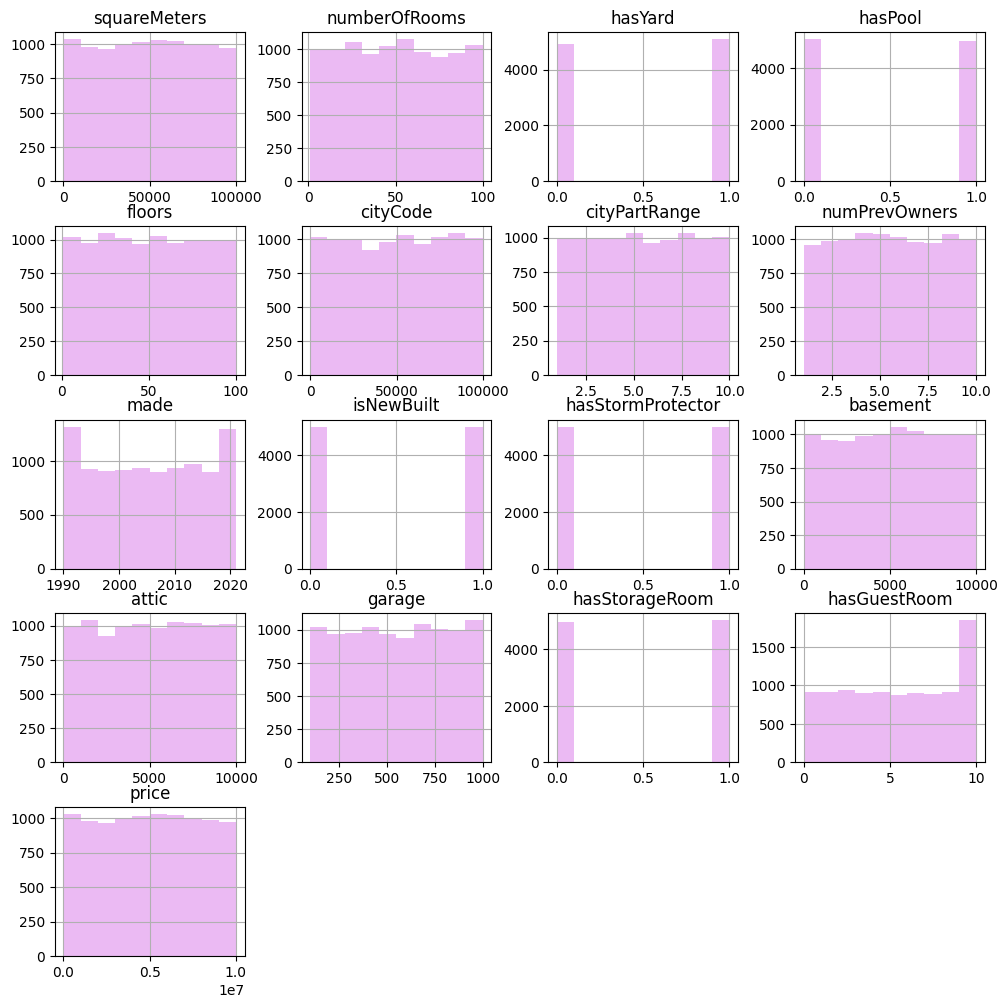

In [18]:
df.hist(figsize=(12,12), color="#EBBAF3") 

Se debe de checar que no haya valores NaN en el conjunto de datos para poder avanzar en el proceso, y por los resultados podemos apreciar que no hay valor de este estilo.

In [19]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

# Limpieza de datos

Para poder ver si es viable la limpieza hay que ver si hay datos duplicados, pero en base a los resultados podemos ver que no hay.

In [20]:
df.duplicated().sum()

0

De igual checamos por segunda vez si no hay datos nulos en las columnas del conjunto de datos, viendo as&iacute; que no hay.

In [21]:
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64



Por otro lado, como vimos anteriormente, todos nuestros datos son enteros excepto en precio de la viviendo, entonces al momento de querer hacer nuestra regresi&oacute;n lineal tal vez se vea afectada, por lo cual vamos a cambiar las columnas necesarias para nuestra regresi&oacute;n. En este caso, se seleccionaron las columnas squareMeters, garage, attic y basement como variables independientes ya que a mi criterio son valores que afectan en gran medida al precio de la vivienda.

In [22]:
df[["squareMeters","garage", "attic", "basement"]] = df[["squareMeters","garage", "attic", "basement"]].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  float64
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  float64
 12  attic              10000 non-null  float64
 13  garage             10000 non-null  float64
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

# Comprobaci&oacute;n de los datos

Por medio de un diagrama de dispersi&oacute;n se puede checar si los metros cuadrados son una variable que tiene que ver con el precio de la vivienda, as&iacute; que viendo la gr&aacute;fica podemos darnos cuenta que los datos coinciden perfectamente.

<Axes: xlabel='squareMeters', ylabel='price'>

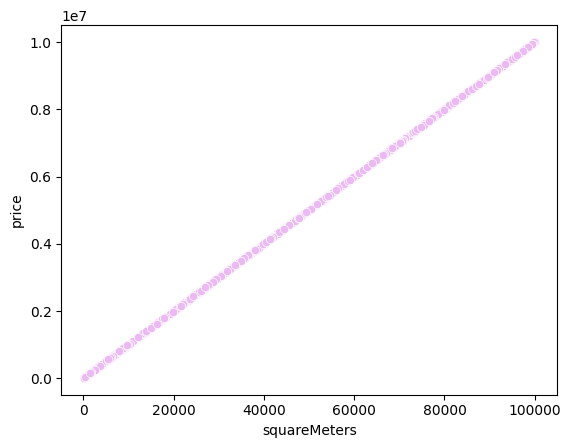

In [23]:
sns.scatterplot(data=df, x="squareMeters", y="price" , color="#EBBAF3")

Aqui graficamos de la misma forma garage, pero vemos que son demasiados puntos en nuestra gr&aacute;fica de dispersi&oacute;n.

<Axes: xlabel='garage', ylabel='price'>

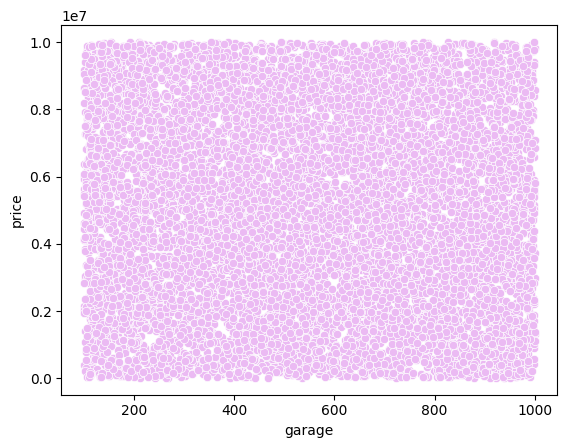

In [24]:
sns.scatterplot(data=df, x="garage", y="price", color="#EBBAF3")

Podemos ver que esto se repite para la columna de basement y probando con la columna de attic sale lo mismo, por lo cual tal vez no es tan viable graficar con estos datos independientes de forma separada.

<Axes: xlabel='basement', ylabel='price'>

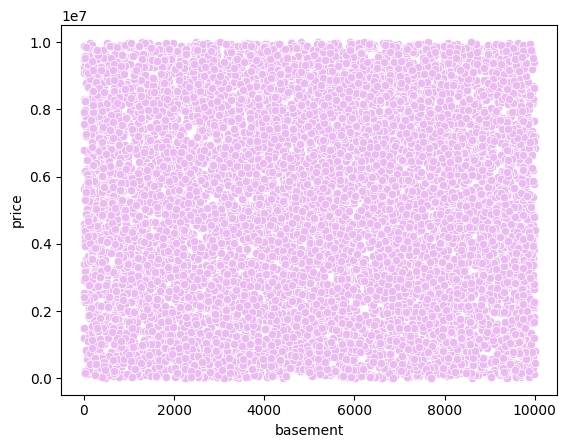

In [25]:
sns.scatterplot(data=df, x="basement", y="price", color="#EBBAF3")

Por lo cual vamos a unir las variables independientes en una sola variable para poder trabajar con ella.

In [26]:
X = df[["squareMeters", "basement", "attic", "garage"]]
y = df["price"]
y


0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64

# Regresi&oacute;n Lineal

Aqui empezamos con el proceso de regresion lineal, separando los datos en 80% de entrenamiento y 20% de prueba

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regresion= LinearRegression()
modelo = regresion.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

En base a la gr&aacute;fica podemos ver que la regresi&oacute;n se hace pero de una forma bastante extraña en el extremo izquierdo, lo cual lo atribuyo a que las gr&aacute;ficas no estan hechas para regresi&oacute;n lineal m&uacute;ltiple, por lo cual con los siguientes datos veremos como le fue a los datos.

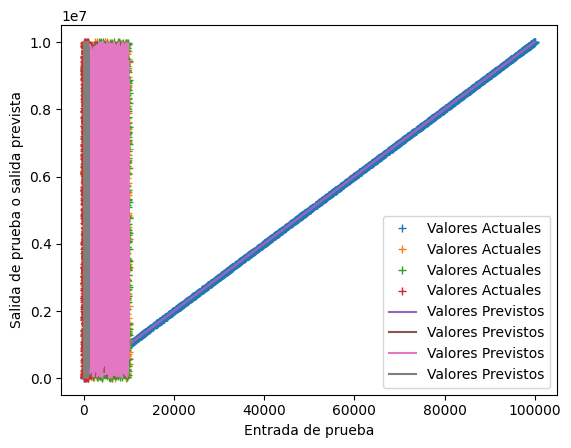

In [36]:
plt.plot(X_test, y_test, '+', label='Valores Actuales')
plt.plot(X_test, y_pred, label="Valores Previstos")
plt.xlabel('Entrada de prueba')
plt.ylabel('Salida de prueba o salida prevista')
plt.legend()
plt.show()

Con los resultados dados podemos ver que los coeficientes del modelo, el valor donde corta el eje y, despues nos muestra el promedio del cuadrado de los errores, el cual nos indica cu&aacute;n bueno es un modelo de regresi&oacute;n en sus predicciones, por &uacute;ltimo nos muestra la puntuaci&oacute;n de la varianza, donde el mejor puntaje es 1.0, los resultados los analizaremos a continuaci&oacute;n.

In [31]:
# Veamos los coeficientes obtenidos
print('Coefficients: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 9.99992788e+01 -1.11528989e-02 -2.02500073e-02  1.49469985e-01]
Independent term: 
 6530.173557952978
Mean squared error: 10581050.00
Variance score: 1.00


# Conclusi&oacute;n

Viendo el como estaban los datos en un inicio se pens&oacute; que la regresi&oacute;n se iba a hacer de forma simple y sin mucho problema, funcion&oacute; con la columna de metros cuadrados, pero al momento de querer ingresar m&aacute;s variables independientes en las gr&aacute;ficas de dispersi&oacute;n podiamos ver que estaban muy cargadas las columnas de s&oacute;tano, &aacute;tico y garage, por lo cual creo que esto fue lo que afecto al momento de graficar.

Analizando los &uacute;ltimos datos mostrados podemos ver que el error cuadrado medio es un valor alto, notando que tal vez el modelo no es tan viable ya que los valores estan muy alejados de las predicciones que se ten&iacute;n, pero al momento de analizar la puntuaci&oacute;n de varianza vemos que tenemos como valor 1.0 el cual nos dice que es el mejor resultado posible evaluando la calidad de las predicciones. 

Con esto llego a la conclusi&oacute;n que el conjunto de datos es perfecto para tratar la regresi&oacute;n lineal y poder predecir el precio de una casa en base a las variables independientes, ya que tuvo un excelente resultado. Pero intuyo que al momento de tratar con regresi&oacute;n m&uacute;ltiple se complica, deformando la gr&aacute;fica de esa forma y nos dio el error cuadrado medio tan alto.
